In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
### ignore warnings caused by librosa 
import warnings
warnings.filterwarnings("ignore")

In [3]:
SAMPLE_RATE = 22050

In [4]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [5]:
# Just some re-shaping and dimension finding
N = 1
print("N:",N)
train = np.load("train.npy")
X_train = train[:,1:]
print("Train shape",X_train.shape)
N_train = X_train.shape[0]
NUM_SAMPLES = X_train.shape[1]-1

N: 1
Train shape (6374, 88200)


In [6]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [7]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [8]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


In [9]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
print(tmp_train.shape)
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
np.save('xtrain_spec.npy', tmp_train)

(6374, 168, 173)


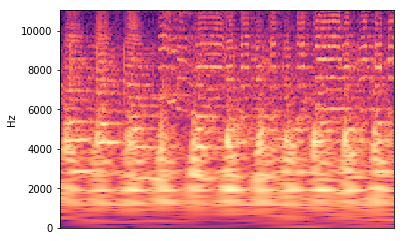

In [10]:
librosa.display.specshow(tmp_train[2], y_axis='hz')

In [11]:
test = np.load("test.npy")
X_test = test[:,1:]
N_test = X_test.shape[0]
tmp_test = np.zeros((N_test,FEATS,FRAMES))
print(tmp_test.shape)
for i in range(N_test):
    tmp_test[i,:,:] = mel_spec(X_test[i])
np.save('test_spec.npy', tmp_test)

(951, 168, 173)
